# IAB딥러닝 10월 13일
> 딥러닝의 기초 - 깊은신경망(4) --> 드랍아웃

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김준형

# Import

In [1]:
import torch
from fastai.vision.all import *
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# plt.plot 오류 발생 시 사용

# 데이터

In [5]:
torch.manual_seed(5)
x = torch.linspace(0, 1, 100).reshape(100, 1)
y = torch.randn(100).reshape(100, 1) * 0.01

In [6]:
xtrain = x[:80]
ytrain = y[:80]
xtest = x[80:]
ytest = y[80:]

# 드랍아웃

## 오버피팅의 해결

`-` 오버피팅 해결책 : 드랍아웃

In [7]:
torch.manual_seed(1)
net = torch.nn.Sequential(torch.nn.Linear(in_features = 1, out_features = 512),
                         torch.nn.ReLU(),
                         torch.nn.Dropout(0.8),
                         torch.nn.Linear(in_features = 512, out_features = 1))
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters())

for epoch in range(1000):
    ## step 1
    #
    ## stpe 2
    loss = loss_fn(net(xtrain), ytrain)
    ## step 3
    loss.backward()
    ## step 4
    optimizer.step()
    optimizer.zero_grad()

Text(0.5, 1.0, 'network is in training mode')

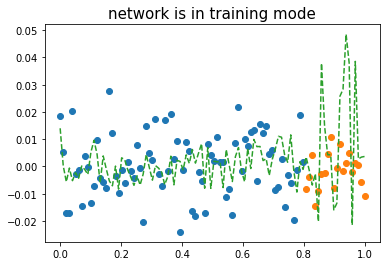

In [8]:
plt.plot(xtrain, ytrain, 'o')
plt.plot(xtest, ytest, 'o')
plt.plot(x, net(x).data, '--')
plt.title(r"network is in training mode", fontsize = 15)

`-` 올바른 사용법

In [9]:
net.training

True

In [10]:
net.eval()
net.training

False

Text(0.5, 1.0, 'network is in evaluation mode')

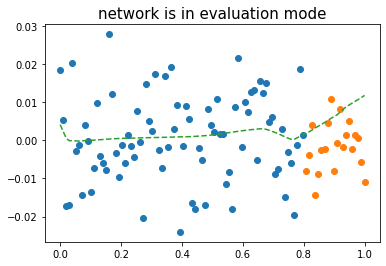

In [11]:
plt.plot(xtrain, ytrain, 'o')
plt.plot(xtest, ytest, 'o')
plt.plot(x, net(x).data, '--')
plt.title(r'network is in evaluation mode', fontsize = 15)

In [13]:
_x = torch.linspace(0, 1, 101)
_x

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900, 1.0000])

In [14]:
dout = torch.nn.Dropout(0.9)
dout(_x)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1.3000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 2.9000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 4.1000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 5.9000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 7.1000,
        0.0000, 0.0000, 0.0000, 0.0000, 7.6000, 7.7000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 8.9000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

 - 90%의 드랍아웃 : 드랍아웃층의 입력 중 임의로 90%를 골라서 결과를 0으로 만든다. + 그리고 0이 되지않고 살아남은 값들은 10배만큼 값이 커진다.

`-` IAB 딥러닝 수업 자료를 기반으로 공부한 내용입니다.